In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import

In [36]:
df=pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [37]:
# pip install seaborn

In [38]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [39]:
mean_longitude = df['dropoff_longitude'].mean()
mean_latitude = df['dropoff_latitude'].mean()

# Fill missing values with the calculated mean
df['dropoff_longitude'] = df['dropoff_longitude'].fillna(mean_longitude)
df['dropoff_latitude'] = df['dropoff_latitude'].fillna(mean_latitude)


In [40]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [41]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117375,6.794812,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  200000 non-null  float64
 7   dropoff_latitude   200000 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [43]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [44]:
df['year']=df['pickup_datetime'].dt.year
df['month']=df['pickup_datetime'].dt.month
df['hour']=df['pickup_datetime'].dt.hour
df['dayofweek']=df['pickup_datetime'].dt.dayofweek
df['day']=df['pickup_datetime'].dt.day
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,dayofweek,day
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,19,3,7
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,20,4,17
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,21,0,24
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,8,4,26
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,17,3,28


In [45]:
df.drop(['key', 'pickup_datetime'], axis=1, inplace=True, errors='ignore')
df.drop(['Unnamed: 0'], axis=1, inplace=True, errors='ignore')
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,dayofweek,day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,19,3,7
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,20,4,17
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,21,0,24
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,8,4,26
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,17,3,28


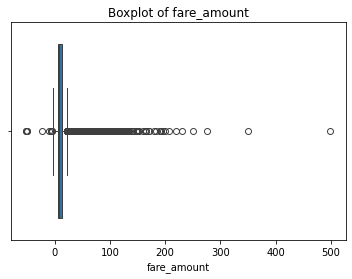

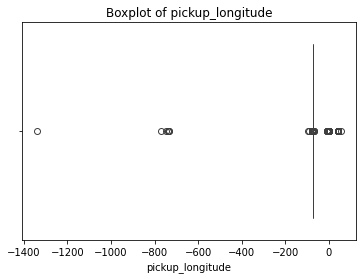

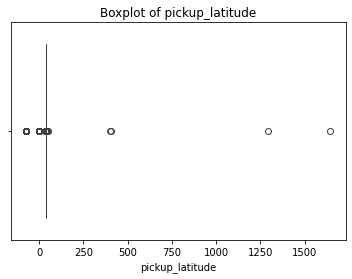

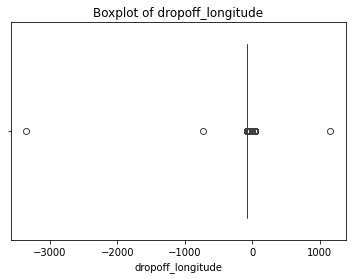

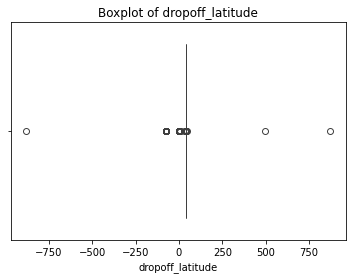

In [46]:
nc = ['fare_amount', 'pickup_longitude' ,'pickup_latitude' ,'dropoff_longitude' ,'dropoff_latitude']
for col in nc:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [53]:
for col in nc:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

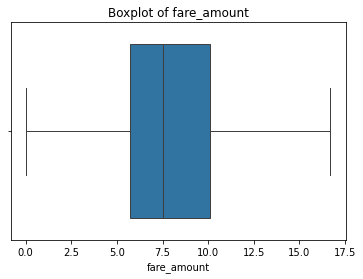

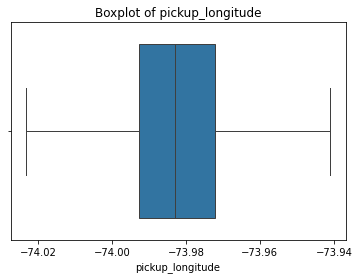

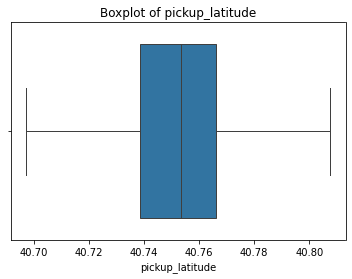

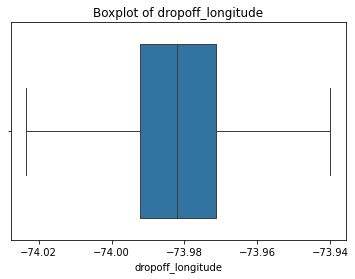

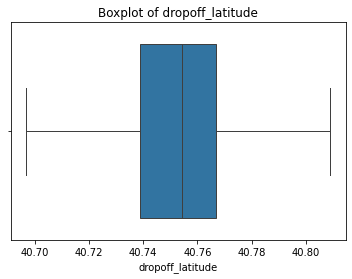

In [54]:
nc = ['fare_amount', 'pickup_longitude' ,'pickup_latitude' ,'dropoff_longitude' ,'dropoff_latitude']
for col in nc:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [55]:
corr=df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,dayofweek,day
fare_amount,1.000000,-0.056361,-0.066997,-0.027557,-0.064052,0.019570,0.133137,0.028051,0.016974,0.008900,0.004734
pickup_longitude,-0.056361,1.000000,0.692891,0.462518,0.405092,-0.014551,-0.001436,-0.002457,0.019352,-0.037909,-0.004973
pickup_latitude,-0.066997,0.692891,1.000000,0.389127,0.562545,-0.013057,0.002613,0.001227,0.035585,-0.053387,-0.003088
dropoff_longitude,-0.027557,0.462518,0.389127,1.000000,0.664997,-0.015100,0.003363,-0.001468,0.005482,-0.033528,-0.010230
dropoff_latitude,-0.064052,0.405092,0.562545,0.664997,1.000000,-0.010913,0.005283,0.001057,0.025725,-0.041775,-0.008070
passenger_count,0.019570,-0.014551,-0.013057,-0.015100,-0.010913,1.000000,0.004106,0.007934,0.015669,0.038530,0.001657
year,0.133137,-0.001436,0.002613,0.003363,0.005283,0.004106,1.000000,-0.115318,0.004972,0.006315,-0.012035
month,0.028051,-0.002457,0.001227,-0.001468,0.001057,0.007934,-0.115318,1.000000,-0.003914,-0.011272,-0.016633
hour,0.016974,0.019352,0.035585,0.005482,0.025725,0.015669,0.004972,-0.003914,1.000000,-0.080365,0.003447
dayofweek,0.008900,-0.037909,-0.053387,-0.033528,-0.041775,0.038530,0.006315,-0.011272,-0.080365,1.000000,0.005421


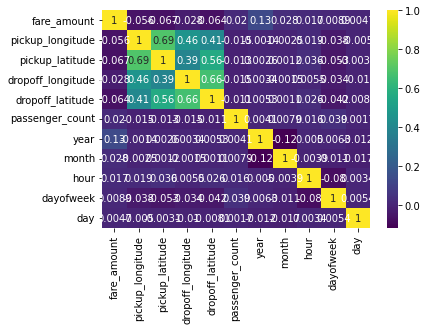

In [56]:
# To enable annotations, set the annot parameter to True . This will display the data values in each cell of the heatmap.
# Specifies the colormap for the heatmap.
# corr() is invoked on the Pandas DataFrame to determine the correlation between different variables including predictor and response variables.
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

In [57]:
from geopy.distance import great_circle

def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []

    # Iterate through the coordinate lists
    for lon1, lat1, lon2, lat2 in zip(longitude1, latitude1, longitude2, latitude2):
        # Create tuples of (latitude, longitude)
        coord1 = (lat1, lon1)
        
        coord2 = (lat2, lon2)
        
        # Calculate the great-circle distance using geopy
        distance = great_circle(coord1, coord2).kilometers
        
        # Append the distance to the list
        travel_dist.append(distance)
    
    return travel_dist

In [30]:
# pip install geopy

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 150.2 kB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 KB 375.0 kB/s eta 0:00:001m702.7 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [58]:
df['dist_travel_km'] = distance_transform(df['pickup_longitude'].to_numpy(), 
                                          df['pickup_latitude'].to_numpy(),
                                          df['dropoff_longitude'].to_numpy(), 
                                          df['dropoff_latitude'].to_numpy() ) 
df.head() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,hour,dayofweek,day,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,19,3,7,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,20,4,17,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,21,0,24,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,8,4,26,1.661686
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,2,5,12,0.000000


In [59]:

x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=9) 
#in random state we can take any value, when random state is changed the accuracy will also change


In [78]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events.

In [80]:
regression.fit(x_train,y_train)

LinearRegression()

In [82]:
regression.intercept_ #To find the linear intercept
# The meaning of intercept of a line is the point at which it intersects either the x-axis or y-axis.

8.105801458283528

In [83]:
regression.coef_ #To find the linear coeeficient
# estimates of the first-order derivative of the Taylor polynomial 

array([ 0.00889799,  0.04716035, -0.01807295, -0.19774936,  0.04090322,
        0.06479836,  0.00568932,  0.15525756,  0.57527439, -0.06807375,
        2.50271683])

In [122]:
y_pred=regression.predict(x_test)
y_pred

array([12.37085206,  6.61094546, 11.94257625, ...,  7.54640843,
        5.54884286,  5.83411976])

In [123]:
from sklearn.metrics import r2_score

In [124]:
r2_score(y_test,y_pred)

0.6430515105725936

 to evaluate the quality of a regression model. It measures how well the model fits the data 

In [125]:
MSE = mean_squared_error(y_test,y_pred)
MSE

3.5507519764673927

The value of the error ranges from zero to infinity. MSE increases exponentially with an increase in error

In [126]:
RMSE = np.sqrt(MSE)
RMSE

1.8843439114098552

to measure the accuracy of a predictive model. It quantifies the differences between predicted values and actual values, squaring the errors, taking the mean, and then finding the square root.

In [106]:
#RANDOM FOREST 
from sklearn.ensemble import RandomForestRegressor

A random forest (RF) is an ensemble of decision trees in which each decision tree is trained with a specific random noise. Random forests are the most popular form of decision tree

In [108]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [113]:
r_pred = rf.predict(x_test)
r_pred

array([13.05,  6.45, 14.03, ...,  6.3 ,  5.63,  4.9 ])

In [115]:
R=r2_score(y_test,r_pred)
R

0.7046477914682906

In [117]:
r_MSE = mean_squared_error(y_test,r_pred)
r_MSE

2.93802178538497

In [118]:
RMSE = np.sqrt(MSE)
RMSE

1.8843439114098552